In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import twint
import nest_asyncio


%matplotlib inline

In [2]:
nest_asyncio.apply()

In [9]:
t = twint.Config()
t.Username = "YahooSportsNBA"
t.Since = '2021-01-31'
t.Pandas = True
twint.run.Search(t)

1371523338527444993 2021-03-15 14:07:00 -0400 <YahooSportsNBA> The @WNBA unveiled a new logo to celebrate its 25th anniversary 👀 #CountIt   https://t.co/vJwBnTPf7F
1371516350213029896 2021-03-15 13:39:14 -0400 <YahooSportsNBA> 🔘 JaVale McGee getting interest from the Nets 🔘 What's going on with DeMar DeRozan? 🔘 Nurk returning soon?   More notes from @ChrisBHaynes in Hoopla with Haynes ➡️  https://t.co/WyjsDGXVcE  https://t.co/r5yXvEatqR
1371286088405385216 2021-03-14 22:24:15 -0400 <YahooSportsNBA> ANOTHER DAY, ANOTHER ANTHONY EDWARDS JAM 💥   https://t.co/w96pJBWhUT
1371278872881336320 2021-03-14 21:55:35 -0400 <YahooSportsNBA> Jayson Tatum made this look too easy 👀   https://t.co/MyxA5l6b77
1371263992836943874 2021-03-14 20:56:27 -0400 <YahooSportsNBA> Jaylen faked 'em out 😂   https://t.co/MNMHPc0qFA
1371254793176375302 2021-03-14 20:19:54 -0400 <YahooSportsNBA> Ben Simmons with authority 🔨  (via @sixers)   https://t.co/CMlevDT3dv
1371242774528466945 2021-03-14 19:32:08 -0400 <YahooSp

1364892898911686658 2021-02-25 06:00:00 -0400 <YahooSportsNBA> "KD is the best player in the world right now."  @LaJethroJenkins and Seerat Sohi break down the red-hot Nets and which teams could potentially matchup best with them.
1364799134708867073 2021-02-24 23:47:25 -0400 <YahooSportsNBA> Spida too tough 😬  (via @utahjazz)   https://t.co/XNpGEU0ies
1364759455544406021 2021-02-24 21:09:44 -0400 <YahooSportsNBA> Myles says 🚫   https://t.co/6VciNRYd03
1364748956891234304 2021-02-24 20:28:01 -0400 <YahooSportsNBA> Anthony Edwards is sooo mean to the rims 😳   https://t.co/74enz4puOw
1364748302957219843 2021-02-24 20:25:25 -0400 <YahooSportsNBA> Gallo showing off the range 🎯   https://t.co/vPUvwO4Xtn
1364687975511183363 2021-02-24 16:25:42 -0400 <YahooSportsNBA> Fans logging on when they think their team got disrespected on national TV games...  https://t.co/9UwQjJ8A5Q
1364675723395403777 2021-02-24 15:37:01 -0400 <YahooSportsNBA> The NBA released the second half of the 2021 schedule.   

1359224066096443397 2021-02-09 14:34:05 -0400 <YahooSportsNBA> After 11 seasons, @ReneeMontgomery is retiring to focus on her social justice work in Atlanta.  ➡️  https://t.co/1Z63bp8bop  https://t.co/6pP4oAt3ob
1358988145140797443 2021-02-08 22:56:37 -0400 <YahooSportsNBA> Holy Murray 😱   https://t.co/8T4xggYYUO
1358973403214999568 2021-02-08 21:58:02 -0400 <YahooSportsNBA> Anthony Edwards got up 😤   https://t.co/97I4VqQukq
1358944748271140864 2021-02-08 20:04:10 -0400 <YahooSportsNBA> The typically old school Kevin Garnett was unexpectedly complimentary of today’s NBA 👀  ➡️  https://t.co/Tj2ZBB248Q  https://t.co/S25EEzg10v
1358895865566486531 2021-02-08 16:49:56 -0400 <YahooSportsNBA> "Racism is taught."  Donovan Mitchell and Rudy Gobert called out a Utah school for initially allowing parents to opt their students out of Black History Month curriculum.   ➡️  https://t.co/eaOm0nIwSg  https://t.co/et2OyFL6Pv
1358888071119450118 2021-02-08 16:18:57 -0400 <YahooSportsNBA> "You didn't los

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [10]:
df = twint.storage.panda.Tweets_df

In [11]:
df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1371523338527444993,1371523338527444993,1.615832e+12,2021-03-15 14:07:00,-0400,,The @WNBA unveiled a new logo to celebrate its...,en,[countit],[],...,,,,,,[],,,,
1,1371516350213029896,1371516350213029896,1.615830e+12,2021-03-15 13:39:14,-0400,,🔘 JaVale McGee getting interest from the Nets ...,en,[],[],...,,,,,,[],,,,
2,1371286088405385216,1371286088405385216,1.615775e+12,2021-03-14 22:24:15,-0400,,"ANOTHER DAY, ANOTHER ANTHONY EDWARDS JAM 💥 h...",en,[],[],...,,,,,,[],,,,
3,1371278872881336320,1371278872881336320,1.615773e+12,2021-03-14 21:55:35,-0400,,Jayson Tatum made this look too easy 👀 https...,en,[],[],...,,,,,,[],,,,
4,1371263992836943874,1371263992836943874,1.615770e+12,2021-03-14 20:56:27,-0400,,Jaylen faked 'em out 😂 https://t.co/MNMHPc0qFA,en,[],[],...,,,,,,[],,,,


In [16]:
test_str = df.loc[4,'tweet']
encoded_test_str = test_str.encode('ascii', "ignore")
decoded_test_str = encoded_test_str.decode()
decoded_test_str

"Jaylen faked 'em out    https://t.co/MNMHPc0qFA"

In [3]:
def create_tweets_dataframe(username, start_date, end_date):
    c = twint.Config()
    c.Username = username
    c.Since = start_date
    c.Until = end_date
    c.Pandas = True
    c.Hide_output = True
    twint.run.Search(c)
    
    dataframe = twint.storage.panda.Tweets_df
    return dataframe
    
    
    

In [139]:
yahoo_df = create_tweets_dataframe('YahooSportsNBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [140]:
crossover_df = create_tweets_dataframe('TheCrossover', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [141]:
athletic_df = create_tweets_dataframe('TheAthleticNBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [142]:
slam_df = create_tweets_dataframe('Slamnewswire', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [9]:
nba_df = create_tweets_dataframe('NBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [143]:
bball_news_df = create_tweets_dataframe('basketbllnews', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [144]:
sb_nation_df = create_tweets_dataframe('SBNationNBA', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [145]:
hoopshype_df = create_tweets_dataframe('hoopshype', '2016-01-01', '2021-02-28')

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [146]:
sum([len(yahoo_df), 
 len(crossover_df), 
 len(athletic_df), 
 len(slam_df), 
 len(sb_nation_df), 
 len(bball_news_df), 
 len(hoopshype_df)])

128512

In [12]:
nba_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [148]:
df_list = [yahoo_df, crossover_df, athletic_df, slam_df, bball_news_df, sb_nation_df, hoopshype_df]
for dataframe in df_list:
    dataframe.drop(columns=['id', 'conversation_id', 'created_at', 'timezone', 'place',
       'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], inplace=True)

In [149]:
yahoo_df['source'] = 'Yahoo'
crossover_df['source'] = 'SI'
athletic_df['source'] = 'The Athletic'
slam_df['source'] = 'Slam'
nba_df['source'] = 'NBA'
bball_news_df['source'] = 'Basketball News'
sb_nation_df['source'] = 'SB Nation'
hoopshype_df['source'] = 'HoopsHype'

In [177]:
twitter_df = pd.concat([yahoo_df, crossover_df, athletic_df, sb_nation_df, 
                        hoopshype_df, slam_df, bball_news_df], ignore_index=True)

In [151]:
pd.set_option('display.max_colwidth', 100)
twitter_df.head()

,date,tweet,source
0,2021-02-26 12:35:27,"Obi Toppin is expected to participate in the NBA Slam Dunk Contest, per @ShamsCharania. 👀 https...",Yahoo
1,2021-02-25 23:08:17,MPJ SLAM 💥 https://t.co/bp6XsbTzUT,Yahoo
2,2021-02-25 17:48:50,Timberwolves G Malik Beasley has been suspended for 12 games due to conduct stemming from charge...,Yahoo
3,2021-02-25 13:40:20,Luka's game-winner against the Celtics vs. Luka's game-winner against the Clippers. Unreal 🤯 ...,Yahoo
4,2021-02-25 13:10:50,It's time to stop underrating the Utah Jazz 👀 From @KrystenPeek ⤵️,Yahoo


In [152]:
pd.set_option("display.max_rows", 101)
twitter_df.sample(n=100)

,date,tweet,source
71247,2019-04-14 11:26:09,"Worst-case scenario? For the Sixers indeed it was, as the issues haunting the team all year emer...",The Athletic
61333,2016-04-19 00:56:01,WATCH: “I think the conference finals is totally in play.” @BenGolliver on the revamped Heat ht...,SI
25494,2019-01-27 14:11:02,Kevin Durant and the Thunder can at least agree on one thing: Everyone loves Nick Collison http...,SI
128082,2021-02-24 14:18:02,Kenyon Martin was NOT a fan of the Cam Newton heckler 😳 Full episode of @NeatNUnfiltered: htt...,Basketball News
109619,2017-09-30 20:30:04,We project them to finish at No. 7 in the Western Conference. https://t.co/mNS7HuJiE3,HoopsHype
34334,2018-06-01 01:05:04,Can LeBron announce Space Jam 2 during the Finals to give us some intrigue? https://t.co/yD6qmV...,SI
17399,2019-10-18 22:17:03,"Expanding the draft would likely be appealing to Adam Silver and the NBA, but college coaches li...",SI
128418,2021-01-31 16:13:10,Rudy Gobert 🧐 https://t.co/xc3cvZMw4u,Basketball News
100714,2018-09-23 10:33:01,We project them to move up one spot in the Western Conference. https://t.co/P8DlZE2Cmt,HoopsHype
103720,2018-05-26 06:46:05,@rex_rexchapman @KingJames Nah.,HoopsHype


In [19]:
from bs4 import BeautifulSoup
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

In [20]:
def clean_tweets(text):
    """This function takes in a string (in this case a tweet) and cleans the string such that any and all
    non-ASCII charcaters and HTML characters references are removed.
    
    The string will still have all forms of punctuation.
    
    """
    text = re.sub(' +', ' ', text) #reduce instances of multiple blank spaces to a single space
    text = re.sub(r"http\S+", '', text) #remove links from tweets
    encoded_text = text.encode('ascii', 'ignore') #encode string using 'ascii' encoding
    decode_text = encoded_text.decode() #decode string (convert from bytes to string object)
    text_reclean = re.sub(' +', ' ', decode_text) #reduce instances of multiple blank spaces to a single space
    clean_text = BeautifulSoup(text_reclean, 'lxml').text #remove all html encodings such as &amp;, &quot;, etc.
    
    return clean_text

In [178]:
twitter_df['tweet'] = twitter_df['tweet'].apply(lambda x: clean_tweets(x))

In [22]:
def clean_tweets_modeling(text):
    """Performs a similar operation as the clean_tweets function except this function will create a list of 
    tokens that can be used for NLP modeling.
    
    For example, a tweet will be transformed such that all non-ASCII characters and HTML encodings are removed.
    Then the function will remove all punctuation from the tweet, split each word in the tweet by white space,
    and finally lemmatize each word in the tweet and group the lemmatized tokens in a list."""
    
    text = re.sub(' +', ' ', text) #reduce instances of multiple spaces to a single space
    encoded_text = text.encode('ascii', 'ignore') #encode text as ascii characters only
    decode_text = encoded_text.decode() #convert bytes back to a string
    clean_text = BeautifulSoup(decode_text, 'lxml').text #remove html tages using BeautifulSoup
    
    no_punc_text = "".join([word for word in clean_text if word not in string.punctuation]) #remove punctuation
    tokens = re.split('\W+', no_punc_text) #split words by in no_punc_text variable by whitespace
    
    #Lemmatize each token and store tokens in a list
    final_tokens = [wnl.lemmatize(word) for word in tokens if word not in stopwords]
    
    return final_tokens

In [179]:
twitter_df['tweet_tokens'] = twitter_df['tweet'].apply(lambda x: clean_tweets_modeling(x.lower()))

In [81]:
len(twitter_df)

128512

In [155]:
twitter_df.sample(n=100)

,date,tweet,source,tweet_tokens
66450,2020-10-25 12:03:52,@esbuenodun @TheAthleticNYC @SethPartnow oh no,The Athletic,"[esbuenodun, theathleticnyc, sethpartnow, oh]"
28145,2018-11-16 14:08:42,,SI,[]
82772,2016-07-02 14:56:52,"The Kings have come to terms with Arron Afflalo on a 2 year, $25 million deal, per @WojVerticalN...",SB Nation,"[king, come, term, arron, afflalo, 2, year, 25, million, deal, per, wojverticalnba, ]"
76304,2017-10-17 19:57:57,THE NBA IS BACK LETS GOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SB Nation,"[nba, back, let, gooooooooooooooooooooooooooooooooooooooooooooo]"
42718,2017-11-16 11:00:25,The NBAs best unicorn: Kristaps Porzingis,SI,"[nbas, best, unicorn, kristaps, porzingis, ]"
27141,2018-12-13 08:58:02,2019 NBA Draft Big Board 2.0: 1. Zion Williamson 2. R.J. Barrett 3. Cam Reddish More:,SI,"[2019, nba, draft, big, board, 20, 1, zion, williamson, 2, rj, barrett, 3, cam, reddish, ]"
94879,2019-07-01 12:19:28,FWIW.,HoopsHype,"[fwiw, ]"
48030,2017-06-08 14:15:08,What's on the line if the Warriors finish the NBA playoffs 16-0? (by @BenGolliver),SI,"[whats, line, warrior, finish, nba, playoff, 160, bengolliver, ]"
93612,2019-09-11 17:00:59,New York Knicks NBA awards: All the winners in team history.,HoopsHype,"[new, york, knicks, nba, award, winner, team, history, ]"
63621,2016-02-13 20:03:58,Its time for All-Star Saturday Night: Join @SINow's NBA experts by following our live blog:,SI,"[time, allstar, saturday, night, join, sinows, nba, expert, following, live, blog, ]"


In [26]:
def tfidf_vectorizer(dataframe):
    
    tfidf = TfidfVectorizer(stop_words=stopwords)
    tfidf_sparse_mat = tfidf.fit_transform(dataframe['tweet'])
    
    tfidf_df = pd.DataFrame(tfidf_sparse_mat.toarray())
    tfidf_df.columns = tfidf.get_feature_names()
    
    return tfidf_df

In [27]:
twitter_tfidf_df = tfidf_vectorizer(twitter_df)

In [180]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
twitter_sparse_mat = vectorizer.fit_transform(twitter_df['tweet'])

In [82]:
twitter_sparse_mat.shape

(128512, 33610)

In [29]:
from sklearn.decomposition import TruncatedSVD


In [211]:
pca_1000 = TruncatedSVD(n_components=1000, random_state=23)
vec_matrix_pca_1000 = pca_1000.fit_transform(twitter_sparse_mat)

In [212]:
pca_100 = TruncatedSVD(n_components=100, random_state=23)
vec_matrix_pca_100 = pca_100.fit_transform(twitter_sparse_mat)

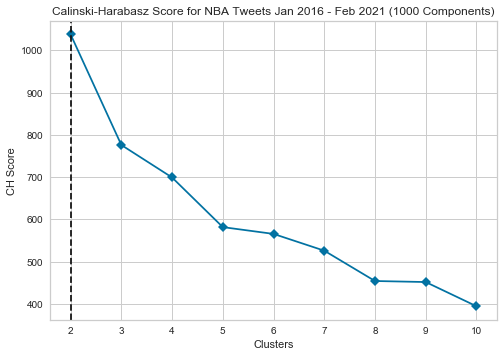

In [213]:
kmodel = KMeans()
tweet_viz = KElbowVisualizer(kmodel, k=(2,11), metric = 'calinski_harabasz', timings=False)
tweet_viz.fit(vec_matrix_pca_1000)
plt.title('Calinski-Harabasz Score for NBA Tweets Jan 2016 - Feb 2021 (1000 Components)')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('twitter_ch_plot_1000.png')

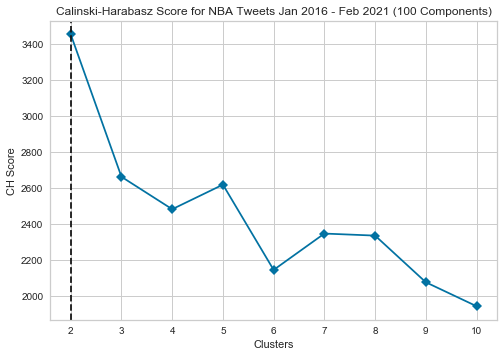

In [214]:
kmodel = KMeans()
tweet_viz_100 = KElbowVisualizer(kmodel, k=(2,11), metric = 'calinski_harabasz', timings=False)
tweet_viz_100.fit(vec_matrix_pca_100)
plt.title('Calinski-Harabasz Score for NBA Tweets Jan 2016 - Feb 2021 (100 Components)')
plt.xlabel('Clusters')
plt.ylabel('CH Score')
plt.savefig('twitter_ch_plot_100pca.png')

In [227]:
twitter_df.drop(columns=['quad_labels', 'six_cat'], inplace=True)

## 2 Clusters

In [215]:
kmeans_two = KMeans(n_clusters=2, random_state=123)
kmeans_two.fit(vec_matrix_pca_100)
twitter_df['dual_labels'] = kmeans_two.labels_

In [228]:
twitter_df['dual_labels'].value_counts()

0    102658
1     25854
Name: dual_labels, dtype: int64

In [229]:
twitter_df.loc[twitter_df['dual_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,five_labels
121385,2016-06-01 22:21:21,Wesley Johnson is opting out too.,HoopsHype,"[wesley, johnson, opting, ]",0,1
88386,2020-09-13 15:24:49,The soft Denver Nuggets are putting up a far bigger fight than the Houston Rockets.,HoopsHype,"[soft, denver, nugget, putting, far, bigger, fight, houston, rocket]",0,1
70926,2019-06-16 14:54:21,Anthony Davis is heading to LA. How did this happen? What's next? All the info you need about th...,The Athletic,"[anthony, davis, heading, la, happen, whats, next, info, need, megatrade, athletic, ]",0,1
60251,2016-05-16 12:30:24,The Russell Westbrook experience remains a roller coaster (by @andrewsharp),SI,"[russell, westbrook, experience, remains, roller, coaster, andrewsharp, ]",0,1
36983,2018-04-05 19:15:10,Is there room in U.S. Copyright law for more than one barbershop sports talk series? @McCannSpor...,SI,"[room, u, copyright, law, one, barbershop, sport, talk, series, mccannsportslaw, examines, ]",0,1
114813,2017-03-16 14:01:56,Dwyane Wade done for the regular season.,HoopsHype,"[dwyane, wade, done, regular, season, ]",0,1
24111,2019-02-27 12:53:44,Stephen Curry threw a lob to a Parkland student who slammed it home (via @anthonyVslater),SI,"[stephen, curry, threw, lob, parkland, student, slammed, home, via, anthonyvslater, ]",0,1
81894,2016-10-27 14:07:09,#RIPVine,SB Nation,"[ripvine, ]",0,1
17107,2019-11-05 08:06:03,James Harden dropped 44 as the Rockets ended a two-game skid with a win over Ja Morant and the G...,SI,"[james, harden, dropped, 44, rocket, ended, twogame, skid, win, ja, morant, grizzly, monday, ]",0,0
91334,2020-02-17 00:51:50,,HoopsHype,[],0,1


In [230]:
twitter_df.loc[twitter_df['dual_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,five_labels
97348,2019-03-04 04:00:33,How old were NBA legends when they won their first title?,HoopsHype,"[old, nba, legend, first, title, ]",1,2
5560,2019-03-29 21:26:11,Kyrie doing Kyrie things for the win! (via @NBA),Yahoo,"[kyrie, kyrie, thing, win, via, nba, ]",1,2
14257,2020-08-26 18:41:31,Kenny The Jet Smith walks off the set of NBA on TNT to show support for the players (via @NBAonT...,SI,"[kenny, jet, smith, walk, set, nba, tnt, show, support, player, via, nbaontnt, ]",1,2
16574,2019-12-17 19:52:03,Is that LeBron or Magic out there (via @NBA),SI,"[lebron, magic, via, nba, ]",1,0
120949,2016-06-19 23:57:11,A reminder that the last two coaches to win the NBA title had no previous head coaching experien...,HoopsHype,"[reminder, last, two, coach, win, nba, title, previous, head, coaching, experience, took, job]",1,2
3133,2019-10-22 19:02:34,130 days. 20 hours. 10 minutes. 6 seconds. But who's counting? NBA BACK,Yahoo,"[130, day, 20, hour, 10, minute, 6, second, who, counting, nba, back, ]",1,2
69933,2019-12-10 14:44:00,NBA ratings are in a steep decline. What's the solution? | @SherwoodStrauss,The Athletic,"[nba, rating, steep, decline, whats, solution, sherwoodstrauss, ]",1,2
14095,2020-09-30 08:14:29,"NBA Finals preview: LeBron's legacy, asterisktalk and more notes from @SIChrisMannix",SI,"[nba, final, preview, lebrons, legacy, asterisktalk, note, sichrismannix, ]",1,0
55161,2016-11-25 21:00:07,Why each NBA team should be thankful this year (by @RohanNadkarni),SI,"[nba, team, thankful, year, rohannadkarni, ]",1,2
45259,2017-09-03 23:09:16,"Has the NBA sent a message after issuing a $500,000 fine for tampering?",SI,"[nba, sent, message, issuing, 500000, fine, tampering, ]",1,2


## Three Clusters

In [231]:
kmeans_three = KMeans(n_clusters=3, random_state=123)
kmeans_three.fit(vec_matrix_pca_100)
twitter_df['trip_labels'] = kmeans_three.labels_

In [232]:
twitter_df['trip_labels'].value_counts()

1    96340
2    24671
0     7501
Name: trip_labels, dtype: int64

In [233]:
twitter_df.loc[twitter_df['trip_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,five_labels,trip_labels
32435,2018-07-18 20:00:19,"How will the Kawhi trade impact the Spurs, Raptors, 76ers and LeBron? @andrewsharp examines the ...",SI,"[kawhi, trade, impact, spur, raptor, 76ers, lebron, andrewsharp, examines, winner, loser, ]",0,0,0
41855,2017-12-09 20:14:06,James Johnson welcomes the rookie to the league,SI,"[james, johnson, welcome, rookie, league, ]",0,0,0
41685,2017-12-14 00:52:03,"For the first time ever, a LeBron team performs better with him off the floor",SI,"[first, time, ever, lebron, team, performs, better, floor, ]",0,0,0
56996,2016-09-07 19:14:53,WATCH: LeBron sings Happy Birthday to Kevin Love and this old @SInow cover,SI,"[watch, lebron, sings, happy, birthday, kevin, love, old, sinow, cover, ]",0,0,0
64980,2016-01-05 16:14:26,"top 10 NBA features of 2015: LeBron, Curry and more:",SI,"[top, 10, nba, feature, 2015, lebron, curry, ]",1,0,0
120211,2016-07-10 12:45:29,James Johnson joining Heat.,HoopsHype,"[james, johnson, joining, heat, ]",0,0,0
24166,2019-02-26 12:40:06,"For LeBron and the Lakers, baffling losses have become a feature, not a bug",SI,"[lebron, lakers, baffling, loss, become, feature, bug, ]",0,0,0
49041,2017-05-14 13:28:59,Open Floor Pod: What happened to James Harden?,SI,"[open, floor, pod, happened, james, harden, ]",0,0,0
26208,2019-01-09 00:32:05,Power Rankings: James Hardens run of 40-point games is keeping the Rockets afloat,SI,"[power, ranking, james, hardens, run, 40point, game, keeping, rocket, afloat, ]",0,0,0
38827,2018-02-20 15:55:05,The longstanding dominance of LeBron James continued at All-Star Weekend,SI,"[longstanding, dominance, lebron, james, continued, allstar, weekend, ]",0,0,0


In [234]:
twitter_df.loc[twitter_df['trip_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,five_labels,trip_labels
3833,2019-07-15 15:24:46,"""We didn't sign him with the intention of just trading him."" Bob Myers with the vote of confiden...",Yahoo,"[didnt, sign, intention, trading, bob, myers, vote, confidence, dlo, via, anthonyvslater, ]",0,1,1
85728,2016-02-13 20:05:17,"Up first: Taco Bell Skills Challenge. No quesalupas involved. Well, Boogie Cousins is competing,...",SB Nation,"[first, taco, bell, skill, challenge, quesalupas, involved, well, boogie, cousin, competing, sta...",0,1,1
10737,2018-01-24 23:05:34,The Suns and interim coach Jay Triano are doing whatever it takes to get Devin Booker ready for ...,Yahoo,"[sun, interim, coach, jay, triano, whatever, take, get, devin, booker, ready, 3point, contest, s...",0,1,1
103549,2018-05-31 18:13:17,Dwane Casey meeting with Pistons.,HoopsHype,"[dwane, casey, meeting, piston, ]",0,1,1
20301,2019-06-16 22:13:07,It's been a turbulent road for Rob Pelinka but he's pulled off quite a feat with the acquisition...,SI,"[turbulent, road, rob, pelinka, he, pulled, quite, feat, acquisition, anthony, davis, ]",0,1,1
53941,2017-01-02 21:20:06,Will you keep your New Year's resolution? @RohanNadkarni hopes these West teams do,SI,"[keep, new, year, resolution, rohannadkarni, hope, west, team, ]",0,1,1
73726,2018-07-01 11:31:00,"good work, @JoelEmbiid",SB Nation,"[good, work, joelembiid, ]",0,1,1
94138,2019-08-12 11:28:00,The teams with the most All-Star selections through the years.,HoopsHype,"[team, allstar, selection, year, ]",0,1,1
39147,2018-02-14 12:25:10,John Wall and Marcin Gortat reportedly met to clear the air,SI,"[john, wall, marcin, gortat, reportedly, met, clear, air, ]",0,1,1
110973,2017-08-06 10:30:04,Free agent look: Nikola Mirotic.,HoopsHype,"[free, agent, look, nikola, mirotic, ]",0,4,1


In [235]:
twitter_df.loc[twitter_df['trip_labels'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,five_labels,trip_labels
60484,2016-05-10 11:58:37,Roundtable: Are the Cavs now a threat to capture NBA title? Three SI writers talked about it,SI,"[roundtable, cavs, threat, capture, nba, title, three, si, writer, talked, ]",1,2,2
21700,2019-05-07 13:40:08,NBA sneaker awards 2018-19: MVP: P.J. Tucker Sneaker of the year: Kyrie 5 More:,SI,"[nba, sneaker, award, 201819, mvp, pj, tucker, sneaker, year, kyrie, 5, ]",1,2,2
74556,2018-02-16 19:23:04,We have @tim_cato live blogging the NBA Celebrity Game with all the seriousness it deserves. Fol...,SB Nation,"[timcato, live, blogging, nba, celebrity, game, seriousness, deserves, follow, along, right, ]",1,2,2
24757,2019-02-12 14:45:07,DeMarcus Cousins widens the distance between the Warriors and the rest of the NBA,SI,"[demarcus, cousin, widens, distance, warrior, rest, nba, ]",1,2,2
94845,2019-07-03 00:15:43,2015 NBA re-draft: The way it should have been.,HoopsHype,"[2015, nba, redraft, way, ]",1,2,2
118174,2016-10-14 11:58:03,We have ranked the Top 30 NBA players over 30.,HoopsHype,"[ranked, top, 30, nba, player, 30, ]",1,2,2
88819,2020-08-12 16:40:02,NBA Best Bet of the Day: LA Clippers clinch versus Denver Nuggets.,HoopsHype,"[nba, best, bet, day, la, clipper, clinch, versus, denver, nugget, ]",1,3,2
25218,2019-02-01 23:35:04,"While rap influences the NBA, Quavo also knows it works the other way around: Its no way hip-hop...",SI,"[rap, influence, nba, quavo, also, know, work, way, around, way, hiphop, would, around, without,...",1,2,2
35115,2018-05-15 19:35:10,You just got selected to represent your team at the NBA Draft Lottery. What's your lucky charm?,SI,"[got, selected, represent, team, nba, draft, lottery, whats, lucky, charm]",1,2,2
70399,2019-10-22 14:43:00,"Who's left now, then? @sam_amick rates next summer's NBA free agency class, starting with Anthon...",The Athletic,"[who, left, samamick, rate, next, summer, nba, free, agency, class, starting, anthony, davis, ]",1,4,2


## Five Clusters

In [219]:
kmeans_five = KMeans(n_clusters=5, random_state=123)
kmeans_five.fit(vec_matrix_pca_100)
twitter_df['five_labels'] = kmeans_five.labels_

In [221]:
twitter_df['five_labels'].value_counts()

1    92128
2    22467
0     7200
3     3947
4     2770
Name: five_labels, dtype: int64

In [222]:
twitter_df.loc[twitter_df['five_labels'] == 0].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,quad_labels,six_cat,five_labels
40795,2018-01-06 19:25:31,Well IT and LeBron seem to be getting along well,SI,"[well, lebron, seem, getting, along, well, ]",0,2,2,0
34359,2018-05-31 21:08:05,Will we see Warriors-Cavs V? How many games will LeBron James play all 48 minutes? The Crossover...,SI,"[see, warriorscavs, v, many, game, lebron, james, play, 48, minute, crossover, answer, important...",1,2,2,0
53613,2017-01-10 23:12:28,James Johnson throws it down on Steph Curry. (via @NBATV),SI,"[james, johnson, throw, steph, curry, via, nbatv]",0,2,2,0
21438,2019-05-15 08:01:06,The Lakers came out clean on draft lottery night. They avoid conspiracy theories and get another...,SI,"[lakers, came, clean, draft, lottery, night, avoid, conspiracy, theory, get, another, asset, hel...",0,2,2,0
34401,2018-05-30 23:42:31,"LeBron James also said ""we're going to see"" if his relationship with Cavs owner Dan Gilbert impa...",SI,"[lebron, james, also, said, going, see, relationship, cavs, owner, dan, gilbert, impact, upcomin...",0,2,2,0
6686,2019-01-16 21:14:36,James Harden with the NASTY... NOPE! (via @BrooklynNets ),Yahoo,"[james, harden, nasty, nope, via, brooklynnets, ]",0,2,2,0
89446,2020-07-02 02:02:57,"Reliving LeBron James' Decision (Day 2): Wade, LBJ hit impasse?",HoopsHype,"[reliving, lebron, james, decision, day, 2, wade, lbj, hit, impasse, ]",0,2,2,0
33872,2018-06-11 18:30:09,"What type of human being is LeBron, really? Here's why we should celebrate The King's character",SI,"[type, human, lebron, really, here, celebrate, king, character, ]",0,2,2,0
48428,2017-05-31 07:35:07,Kevin Durant can finally tip the balance against LeBron James (by @RobMahoney),SI,"[kevin, durant, finally, tip, balance, lebron, james, robmahoney, ]",0,2,2,0
19222,2019-07-19 19:25:31,"""This year I'm going to come up with something more creative, and it's going to look like travel...",SI,"[year, im, going, come, something, creative, going, look, like, traveling, james, harden, ]",0,2,2,0


In [223]:
twitter_df.loc[twitter_df['five_labels'] == 1].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,quad_labels,six_cat,five_labels
59153,2016-06-16 13:07:21,Mark Cuban donating $1 million to help benefit the Dallas LGBT community,SI,"[mark, cuban, donating, 1, million, help, benefit, dallas, lgbt, community, ]",0,0,0,1
42180,2017-12-01 00:36:31,"Good lord Donovan, that rim has a family!",SI,"[good, lord, donovan, rim, family, ]",0,0,0,1
126324,2020-04-08 01:08:14,"""Melo wanted to play right away,"" said Wallace. ""It would have had the potential to disrupt the ...",Slam,"[melo, wanted, play, right, away, said, wallace, would, potential, disrupt, team, chemistry, ]",0,0,0,1
76169,2017-10-27 16:39:36,"Those new Nike hoodies, Jordan Clarkson's IG account, and everything else we loved this week.",SB Nation,"[new, nike, hoodies, jordan, clarksons, ig, account, everything, else, loved, week, ]",0,0,0,1
34721,2018-05-24 07:39:03,Exclusive: Khris Middleton recalls the day after Sterling Browns arrest: We saw the bruises and ...,SI,"[exclusive, khris, middleton, recall, day, sterling, brown, arrest, saw, bruise, mark, face, ]",0,0,0,1
128478,2021-01-28 08:05:36,Morning Tip-Off with Imman: Kyle Lowry Over Everything (featuring: Yasmin Duale),Basketball News,"[morning, tipoff, imman, kyle, lowry, everything, featuring, yasmin, duale, ]",0,0,0,1
8436,2018-06-20 09:36:16,"Dwight Howard traded to the Nets for Timofey Mozgov, two 2nd-rounders and cash, according to @Sh...",Yahoo,"[dwight, howard, traded, net, timofey, mozgov, two, 2ndrounders, cash, according, shamscharania, ]",0,0,0,1
2678,2019-11-18 12:24:04,"The Houston Rockets are waiving Ryan Anderson, per @ShamsCharania.",Yahoo,"[houston, rocket, waiving, ryan, anderson, per, shamscharania, ]",0,0,0,1
6974,2018-12-13 00:47:32,Willie imitating The Mailman. *whispers* worst signature dunk of all time. (@SacramentoKings),Yahoo,"[willie, imitating, mailman, whisper, worst, signature, dunk, time, sacramentokings, ]",0,0,0,1
108889,2017-11-01 10:21:50,"#SmallSampleBut Fournier has career highs in scoring, rebounds, assists, steals, blocks and fiel...",HoopsHype,"[smallsamplebut, fournier, career, high, scoring, rebound, assist, steal, block, field, goalthre...",0,0,0,1


In [224]:
twitter_df.loc[twitter_df['five_labels'] == 2].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,quad_labels,six_cat,five_labels
48355,2017-06-01 21:17:00,"NBA Finals Game 1, First Quarter... DNP-Rust",SI,"[nba, final, game, 1, first, quarter, dnprust]",1,1,1,2
94678,2019-07-09 09:41:40,These are the foreign countries with the most NBA championship rings.,HoopsHype,"[foreign, country, nba, championship, ring, ]",1,1,1,2
94398,2019-07-25 14:36:09,Ranking the NBA's Top 10 Big Threes... More on that here:,HoopsHype,"[ranking, nbas, top, 10, big, three, ]",1,1,1,2
50868,2017-03-29 15:00:18,Which rebuilding NBA team has the most hope? @BenGolliver ranks the cellar-dwellers,SI,"[rebuilding, nba, team, hope, bengolliver, rank, cellardwellers, ]",1,1,1,2
7044,2018-12-06 09:30:53,What would @KDTrey5 be like as an @NBA owner?,Yahoo,"[would, kdtrey5, like, nba, owner, ]",1,1,1,2
13820,2020-12-17 09:17:02,"Few bigs, if any, are currently as dominant as Joel Embiid. He comes in at No. 10 on #SITop100 N...",SI,"[bigs, currently, dominant, joel, embiid, come, 10, sitop100, nba, player, 2021, ]",1,1,5,2
54803,2016-12-08 16:00:18,Will Myles Turner become the NBA's next leading big man? (by @RobMahoney),SI,"[myles, turner, become, nbas, next, leading, big, man, robmahoney, ]",1,1,1,2
95504,2019-06-07 06:28:52,Whoever wins Game 4 wins the NBA title. Agree?,HoopsHype,"[whoever, win, game, 4, win, nba, title, agree]",1,1,1,2
72363,2020-12-01 19:00:18,"OK State-Marquette is on Fox Sports 1 right now It's Cade Cunningham time, the likely No. 1 pick...",SB Nation,"[ok, statemarquette, fox, sport, 1, right, cade, cunningham, time, likely, 1, pick, game, perfec...",1,1,1,2
53640,2017-01-10 14:00:22,What's up with everyone in the NBA wearing undershirts? @The_Step_Back examines,SI,"[whats, everyone, nba, wearing, undershirt, thestepback, examines, ]",1,1,1,2


In [225]:
twitter_df.loc[twitter_df['five_labels'] == 3].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,quad_labels,six_cat,five_labels
101250,2018-08-27 14:59:12,"It's safe to say Manu Ginobili is the best Latin American player ever. (Yeah, Oscar Schmidt was ...",HoopsHype,"[safe, say, manu, ginobili, best, latin, american, player, ever, yeah, oscar, schmidt, great, wh...",0,0,0,3
71358,2019-03-05 11:21:35,The Clippers are the best NBA team in LA. The standings say it and so does Patrick Beverley.,The Athletic,"[clipper, best, nba, team, la, standing, say, patrick, beverley, ]",1,1,1,3
59552,2016-06-04 11:40:07,GALLERY: SIs 100 best photos from nearly 70 years of NBA Finals,SI,"[gallery, si, 100, best, photo, nearly, 70, year, nba, final, ]",1,1,1,3
3603,2019-08-14 17:18:41,One of the best rivalries in NBA history. But who comes out on top? Bird vs. Magic,Yahoo,"[one, best, rivalry, nba, history, come, top, bird, v, magic, ]",1,1,1,3
90352,2020-05-02 18:19:35,BJ Armstrong on '92 Bulls: 'That was the best team I ever played on',HoopsHype,"[bj, armstrong, 92, bull, best, team, ever, played, ]",0,0,0,3
110288,2017-09-07 20:30:02,NBA 2K all-time rosters: The players with the best ratings.,HoopsHype,"[nba, 2k, alltime, roster, player, best, rating, ]",1,1,1,3
57348,2016-08-19 19:31:50,PHOTOS: See the best shots from Day 14 of #Rio2016 #USA,SI,"[photo, see, best, shot, day, 14, rio2016, usa, ]",0,0,0,3
105891,2018-03-04 11:30:00,The best draft-and-stash players of the season.,HoopsHype,"[best, draftandstash, player, season, ]",1,1,1,3
15760,2020-02-13 08:09:07,Duncan Robinson is one of the NBA's best shooters you don't know about,SI,"[duncan, robinson, one, nbas, best, shooter, dont, know, ]",1,1,1,3
45939,2017-08-11 22:40:04,NBA 2K18 will feature all-time teams for all 30 franchises. Who's your squad's best five?,SI,"[nba, 2k18, feature, alltime, team, 30, franchise, who, squad, best, five, ]",1,1,1,3


In [226]:
twitter_df.loc[twitter_df['five_labels'] == 4].sample(n=100, random_state=42)

,date,tweet,source,tweet_tokens,dual_labels,quad_labels,six_cat,five_labels
67040,2020-09-22 11:31:00,"Its going to be an unpredictable offseason for the Bulls, and @Sam_Vecenies team preview has you...",The Athletic,"[going, unpredictable, offseason, bull, samvecenies, team, preview, covered, best, option, 4, co...",0,0,0,4
87136,2021-01-12 11:04:45,On the Wizards: Six potential free-agent replacements for Thomas Bryant.,HoopsHype,"[wizard, six, potential, freeagent, replacement, thomas, bryant, ]",0,0,0,4
113244,2017-05-17 20:11:02,Milos Teodosic free agency: The latest.,HoopsHype,"[milo, teodosic, free, agency, latest, ]",0,0,0,4
97965,2019-02-01 17:00:20,How NBA agents prepare for free agency.,HoopsHype,"[nba, agent, prepare, free, agency, ]",1,1,1,4
94263,2019-08-04 17:00:47,NBA executives give behind-the-scenes look at free agency: 'This is a year-round recruitment',HoopsHype,"[nba, executive, give, behindthescenes, look, free, agency, yearround, recruitment, ]",1,1,1,4
113194,2017-05-20 09:24:06,Free agent look: George Hill.,HoopsHype,"[free, agent, look, george, hill, ]",0,0,0,4
58295,2016-07-09 11:35:36,Hardly KD to the Warriors: @BenLebo takes a look at some of the worst deals of free agency,SI,"[hardly, kd, warrior, benlebo, take, look, worst, deal, free, agency, ]",0,0,0,4
99072,2018-12-05 13:42:00,Euro ball: Free agent sleepers NBA teams should keep an eye on.,HoopsHype,"[euro, ball, free, agent, sleeper, nba, team, keep, eye, ]",1,1,1,4
111839,2017-07-03 18:10:45,Gordon Hayward free agency: The latest.,HoopsHype,"[gordon, hayward, free, agency, latest, ]",0,0,0,4
111661,2017-07-09 13:22:03,Free agent look: Kentavious Caldwell-Pope.,HoopsHype,"[free, agent, look, kentavious, caldwellpope, ]",0,0,0,4


In [237]:
from collections import Counter

In [265]:
twitter_zero = twitter_df.loc[twitter_df['five_labels'] == 0]
twitter_one = twitter_df.loc[twitter_df['five_labels'] == 1]
twitter_two = twitter_df.loc[twitter_df['five_labels'] == 2]
twitter_three = twitter_df.loc[twitter_df['five_labels'] == 3]
twitter_four = twitter_df.loc[twitter_df['five_labels'] == 4]

zero_class_text = []
for element in twitter_zero['tweet_tokens']:
    for word in element:
        zero_class_text.append(word)
        
zero_class_text  = [x for x in zero_class_text if x != '']
zero_class_str = ' '.join(zero_class_text)
zero_dict = Counter(zero_class_text)

one_class_text = []
for element in twitter_one['tweet_tokens']:
    for word in element:
        one_class_text.append(word)
        
one_class_text  = [x for x in one_class_text if x != '']
one_class_str = ' '.join(one_class_text)
one_dict = Counter(one_class_text)

two_class_text = []
for element in twitter_two['tweet_tokens']:
    for word in element:
        two_class_text.append(word)

two_class_text  = [x for x in two_class_text if x != '']        
two_class_str = ' '.join(two_class_text)
two_dict = Counter(two_class_text)

three_class_text = []
for element in twitter_three['tweet_tokens']:
    for word in element:
        three_class_text.append(word)

three_class_text  = [x for x in three_class_text if x != '']
three_class_str = ' '.join(three_class_text)
three_dict = Counter(three_class_text)

four_class_text = []
for element in twitter_four['tweet_tokens']:
    for word in element:
        four_class_text.append(word)
        
four_class_text  = [x for x in four_class_text if x != '']        
four_class_str = ' '.join(four_class_text)
four_dict = Counter(four_class_text)




In [266]:
zero_sorted = dict(sorted(zero_dict.items(), key=lambda item: item[1], reverse=True)) 
one_sorted = dict(sorted(one_dict.items(), key=lambda item: item[1], reverse=True))
two_sorted = dict(sorted(two_dict.items(), key=lambda item: item[1], reverse=True))
three_sorted = dict(sorted(three_dict.items(), key=lambda item: item[1], reverse=True))
four_sorted = dict(sorted(four_dict.items(), key=lambda item: item[1], reverse=True))

zero_count_df = pd.DataFrame.from_dict(zero_sorted, orient='index', columns=['Count'])
zero_count_df.reset_index(inplace=True)
zero_count_df.rename(columns={'index':'Word'}, inplace=True)

one_count_df = pd.DataFrame.from_dict(one_sorted, orient='index', columns=['Count'])
one_count_df.reset_index(inplace=True)
one_count_df.rename(columns={'index':'Word'}, inplace=True)

two_count_df = pd.DataFrame.from_dict(two_sorted, orient='index', columns=['Count'])
two_count_df.reset_index(inplace=True)
two_count_df.rename(columns={'index':'Word'}, inplace=True)

three_count_df = pd.DataFrame.from_dict(three_sorted, orient='index', columns=['Count'])
three_count_df.reset_index(inplace=True)
three_count_df.rename(columns={'index':'Word'}, inplace=True)

four_count_df = pd.DataFrame.from_dict(four_sorted, orient='index', columns=['Count'])
four_count_df.reset_index(inplace=True)
four_count_df.rename(columns={'index':'Word'}, inplace=True)

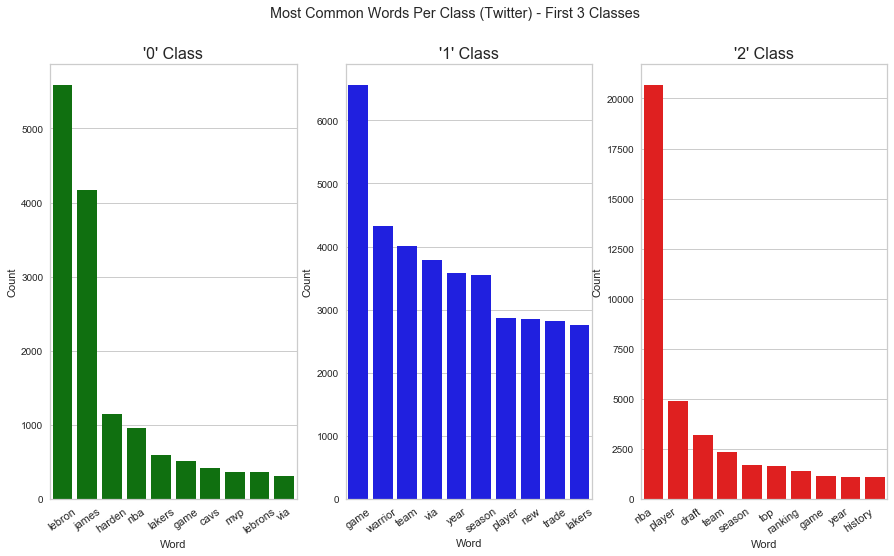

In [269]:
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
sns.barplot(x=zero_count_df['Word'][:10], y=zero_count_df['Count'][:10], 
            data=zero_count_df[:10], ax=axs[0], color='green')
axs[0].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=one_count_df['Word'][:10], y=one_count_df['Count'][:10], 
            data=one_count_df[:10], ax=axs[1], color='blue')
axs[1].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=two_count_df['Word'][:10], y=two_count_df['Count'][:10], 
            data=two_count_df[:10], ax=axs[2], color='red')
axs[2].tick_params(axis='x', labelrotation=35, labelsize=11)

plt.suptitle('Most Common Words Per Class (Twitter) - First 3 Classes')
axs[0].set_title("'0' Class", fontsize=16)
axs[1].set_title("'1' Class", fontsize=16)
axs[2].set_title("'2' Class", fontsize=16)
plt.xticks(horizontalalignment='right')
plt.savefig('twitter_most_common_words_first_three_classes.png')

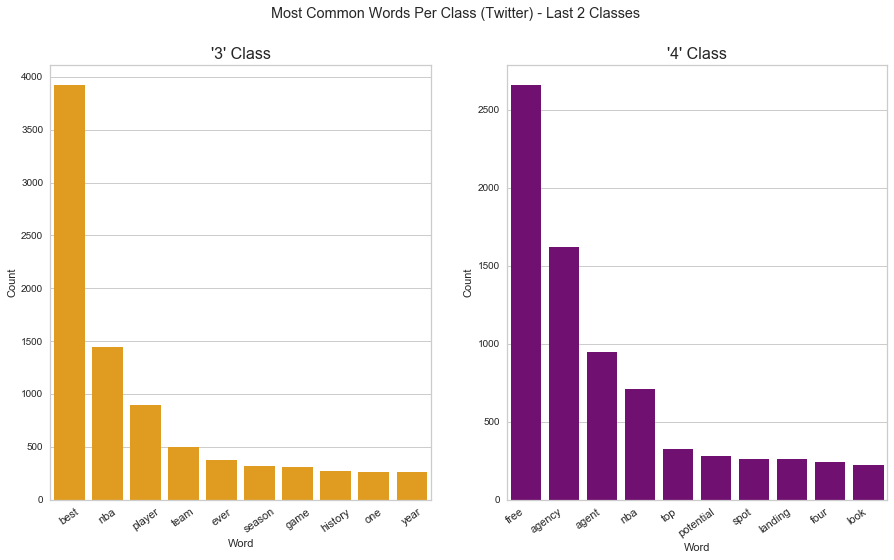

In [270]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x=three_count_df['Word'][:10], y=three_count_df['Count'][:10], 
            data=three_count_df[:10], ax=axs[0], color='orange')
axs[0].tick_params(axis='x', labelrotation=35, labelsize=11)

sns.barplot(x=four_count_df['Word'][:10], y=four_count_df['Count'][:10], 
            data=four_count_df[:10], ax=axs[1], color='purple')
axs[1].tick_params(axis='x', labelrotation=35, labelsize=11)


plt.suptitle('Most Common Words Per Class (Twitter) - Last 2 Classes')
axs[0].set_title("'3' Class", fontsize=16)
axs[1].set_title("'4' Class", fontsize=16)
plt.xticks(horizontalalignment='right')
plt.savefig('twitter_most_common_words_last_two_classes.png')

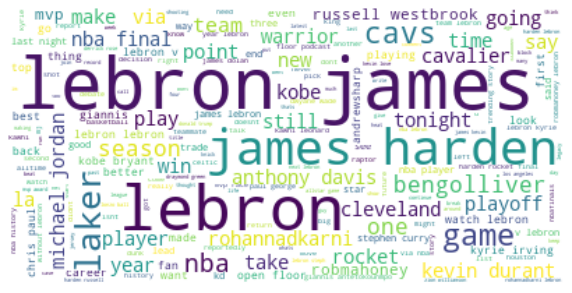

In [271]:
wc_twitter_class_zero = WordCloud(background_color='white')
wc_twitter_class_zero.generate(zero_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_zero, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_zero.to_file('twitter_zero_wordcloud.png')

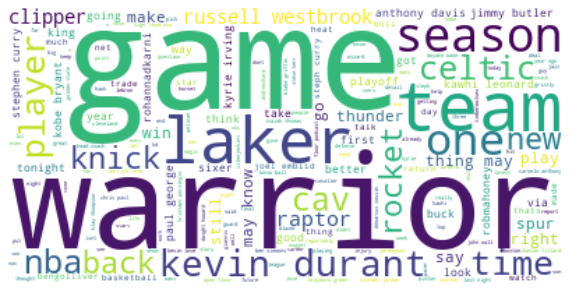

In [272]:
wc_twitter_class_one = WordCloud(background_color='white')
wc_twitter_class_one.generate(one_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_one, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_one.to_file('twitter_one_wordcloud.png')

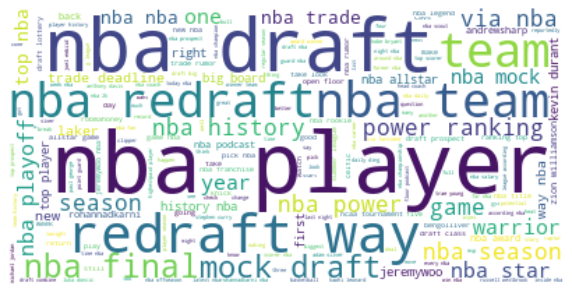

In [273]:
wc_twitter_class_two = WordCloud(background_color='white')
wc_twitter_class_two.generate(two_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_two, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_two.to_file('twitter_two_wordcloud.png')

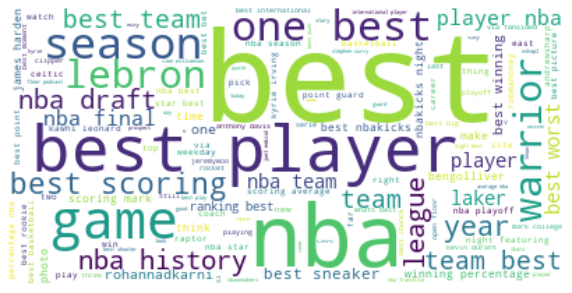

In [274]:
wc_twitter_class_three = WordCloud(background_color='white')
wc_twitter_class_three.generate(three_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_three, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_zero.to_file('twitter_three_wordcloud.png')

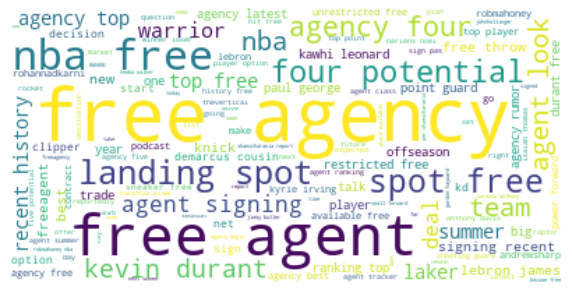

In [275]:
wc_twitter_class_four = WordCloud(background_color='white')
wc_twitter_class_four.generate(four_class_str)

plt.figure(figsize=(10,10))
plt.imshow(wc_twitter_class_four, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_twitter_class_four.to_file('twitter_four_wordcloud.png')

In [276]:
def count_player_mentions(text):
    text_string = text
    
    lebron_count = 0
    curry_count = 0
    harden_count = 0
    kd_count = 0
    kyrie_count = 0
    dame_count = 0
    luka_count = 0
    zion_count = 0
    ja_count = 0
    giannis_count = 0
    
    if text_string.count('LeBron') > 0 or text_string.count('LBJ') > 0 or text_string.count('King James') > 0:
        lebron_count += 1
    
    if text_string.count('Curry') > 0 or text_string.count('Stephen') > 0 or text_string.count('Steph') > 0:
        curry_count += 1
    
    if text_string.count('James Harden') > 0 or text_string.count('Harden') > 0:
        harden_count += 1
        
    if text_string.count('Kevin Durant') > 0 or text_string.count('Durant') > 0 or text_string.count('KD') > 0:
        kd_count += 1
        
    if text_string.count('Kyrie Irving') > 0 or text_string.count('Irving') > 0 or text_string.count('Kyrie') > 0:
        kyrie_count += 1
        
    if text_string.count('Damian Lillard') > 0 or text_string.count('Lillard') > 0 or text_string.count('Dame') > 0:
        dame_count += 1
    
    if text_string.count('Luka Doncic') > 0 or text_string.count('Luka') > 0 or text_string.count('Doncic') > 0:
        luka_count += 1
        
    if text_string.count('Zion Williamson') > 0 or text_string.count('Williamson') > 0 or text_string.count('Zion') >0:
        zion_count += 1
        
    if text_string.count('Ja Morant') > 0 or text_string.count('Morant') > 0 or text_string.count('Ja '):
        ja_count += 1
        
    if text_string.count('Giannis') > 0 or text_string.count('Antetokounmpo') > 0 or text_string.count('Greek Freak') > 0:
        giannis_count += 1
        
    return [lebron_count, curry_count, harden_count, kd_count, 
            kyrie_count, dame_count, luka_count, zion_count, ja_count, giannis_count]

In [277]:
def team_mentions_count(text):
    text_str = text
    
    atl_count = 0
    boston_count = 0
    brooklyn_count = 0
    charlotte_count = 0
    chicago_count = 0
    cleveland_count = 0
    dallas_count = 0
    denver_count = 0
    detroit_count = 0
    gsw_count = 0
    houston_count = 0
    indiana_count = 0
    clippers_count = 0
    lakers_count = 0
    memphis_count = 0
    miami_count = 0
    bucks_count = 0
    minn_count = 0
    pelicans_count = 0
    knicks_count = 0
    okc_count = 0
    orlando_count = 0
    philly_count = 0
    phoenix_count = 0
    portland_count = 0
    sac_count = 0
    spurs_count = 0
    raptors_count = 0
    utah_count = 0
    wizards_count = 0
    
    if text_str.count('Atlanta') > 0 or text_str.count('ATL') > 0 or text_str.count('Hawks') > 0:
        atl_count += 1
        
    if text_str.count('Boston') > 0 or text_str.count('Celtics') > 0:
        boston_count += 1
        
    if text_str.count('Brooklyn') > 0 or text_str.count('Nets') > 0:
        brooklyn_count += 1
        
    if text_str.count('Charlotte') > 0 or text_str.count('Hornets') > 0:
        charlotte_count += 1
        
    if text_str.count('Chicago') > 0 or text_str.count('Bulls') > 0 or text_str.count('Windy City') > 0:
        chicago_count += 1
        
    if text_str.count('Cleveland') > 0 or text_str.count('Cavaliers') > 0 or text_str.count('Cavs') > 0:
        cleveland_count += 1
        
    if text_str.count('Dallas') > 0 or text_str.count('Mavericks') > 0 or text_str.count('Mavs') > 0:
        dallas_count += 1
        
    if text_str.count('Denver') > 0 or text_str.count('Nuggets') > 0:
        denver_count += 1
        
    if text_str.count('Detroit') > 0 or text_str.count('Pistons') > 0 or text_str.count('Motor City') > 0:
        detroit_count += 1
        
    if text_str.count('Golden State') > 0 or text_str.count('Warriors') > 0 or text_str.count('GSW') > 0:
        gsw_count += 1
        
    if text_str.count('Houston') > 0 or text_str.count('Rockets') > 0 or text_str.count('H-Town') > 0:
        houston_count += 1
        
    if text_str.count('Indiana') > 0 or text_str.count('Pacers') > 0:
        indiana_count += 1
        
    if text_str.count('Clippers') > 0 or text_str.count('LAC') > 0 or text_str.count('Clips') > 0:
        clippers_count += 1
        
    if text_str.count('Lakers') > 0 or text_str.count('LAL') > 0:
        lakers_count += 1
        
    if text_str.count('Memphis') > 0 or text_str.count('Grizzlies') > 0:
        memphis_count += 1
        
    if text_str.count('Miami') > 0 or text_str.count('Heat') > 0:
        miami_count += 1
        
    if text_str.count('Milwaukee') > 0 or text_str.count('Bucks') > 0:
        bucks_count += 1
        
    if text_str.count('New Orleans') > 0 or text_str.count('Pelicans') > 0 or text_str.count('NOP') > 0:
        pelicans_count += 1
        
    if text_str.count('NYK') > 0 or text_str.count('Knicks') > 0 or text_str.count('New York') > 0:
        knicks_count += 1
        
    if text_str.count('OKC') > 0 or text_str.count('Thunder') > 0 or text_str.count('Oklahoma City Thunder') > 0:
        okc_count += 1
        
    if text_str.count('Orlando') > 0 or text_str.count('Magic') > 0:
        orlando_count += 1
        
    if text_str.count('Philadelphia') > 0 or text_str.count('76ers') > 0 or text_str.count('Sixers') > 0 or text_str.count('Philly') > 0:
        philly_count += 1
        
    if text_str.count('Phoenix') > 0 or text_str.count('Suns') > 0:
        phoenix_count += 1
        
    if text_str.count('Portland') > 0 or text_str.count('Trailblazers') > 0 or text_str.count('Blazers'):
        portland_count += 1
        
    if text_str.count('Sacramento') > 0 or text_str.count('Kings') > 0:
        sac_count += 1
        
    if text_str.count('San Antonio') > 0 or text_str.count('Spurs') > 0:
        spurs_count += 1
        
    if text_str.count('Toronto') > 0 or text_str.count('Raptors') > 0 or text_str.count('Jurassic Park') > 0:
        raptors_count += 1
        
    if text_str.count('Utah') > 0 or text_str.count('Jazz') > 0 or text_str.count('Salt Lake City') > 0:
        utah_count += 1
        
    if text_str.count('Washington') > 0 or text_str.count('Wizards') > 0 or text_str.count('DC') > 0:
        wizards_count += 1
        
    return [atl_count, boston_count, brooklyn_count, charlotte_count , chicago_count, cleveland_count,
            dallas_count, denver_count, detroit_count, gsw_count, houston_count, indiana_count,
            clippers_count, lakers_count, memphis_count, miami_count, bucks_count, minn_count, pelicans_count,
            knicks_count, okc_count, orlando_count, philly_count, phoenix_count, portland_count, sac_count,
            spurs_count, raptors_count, utah_count, wizards_count]

In [278]:
tweets_list = list(twitter_df['tweet'])

In [281]:
twitter_player_mentions_count = [count_player_mentions(tweet_text) for tweet_text in tweets_list]

twitter_player_mentions_df = pd.DataFrame(twitter_player_mentions_count, 
                                  columns=['Lebron', 'Steph', 'Harden', 'KD', 
                                           'Kyrie','Dame','Luka','Zion','Ja','Giannis'])

In [282]:
twitter_team_mention_count = [team_mentions_count(tweet_text) for tweet_text in tweets_list]
twitter_team_mentions_df = pd.DataFrame(twitter_team_mention_count, 
                                        columns=['ATL', 'BOS', 'BKN', 'CHA', 'CHI', 'CLE', 'DAL','DEN', 
                                                 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 
                                                 'MIL', 'MIN', 'NOP', 'NYK', 'OKC','ORL', 'PHI', 'PHX', 
                                                 'POR', 'SAC', 'SAT', 'TOR', 'UTAH', 'WAS'])

In [ ]:
twitter_player_mentions_df.to_csv('twitter_player_mentions.', index=False)

In [236]:
twitter_df.to_csv('nba_twitter.csv', index=False)